Chapter 09

# 正交投影
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了一个二维向量 $$x = \begin{bmatrix} 4 \\ 3 \end{bmatrix}$$
在不同方向上投影的效果。首先，定义了从 0 到 \( \pi \) 的 25 个角度构成的数组 `thetas`。对每个角度 \(\theta\)，代码构造一个单位向量 \( v(\theta) \)：

$$
v(\theta) = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) \end{bmatrix}
$$

该单位向量表示在平面上旋转的不同方向。然后，通过计算 \( x \) 在 \( v \) 上的投影：

$$
\text{proj} = v^T \cdot x
$$

得出 \( x \) 在每个 \( v \) 方向上的投影长度。代码将此投影结果可视化：首先绘制 \( v \) 方向的直线以指示投影方向，然后绘制从 \( x \) 到其投影点的线段，直观地展示出 \( x \) 在该方向上的投影点。最终效果展示了 \( x \) 随不同方向投影的变化，通过一个红色“x”标记出原始向量 \( x \) 的位置，并在各个方向上绘制投影，给出了 \( x \) 在旋转方向上不同投影的几何图形。

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
from matplotlib.colors import hsv_to_rgb  # 导入HSV到RGB颜色转换函数

## 定义角度序列

In [2]:
thetas = np.linspace(0, np.pi, 25)  # 生成从 0 到 π 的 25 个角度

## 定义向量 x

In [3]:
x = np.array([4, 3])  # 定义二维向量 x

## 创建绘图子图

(-6.6, 6.6, -6.6, 6.6)

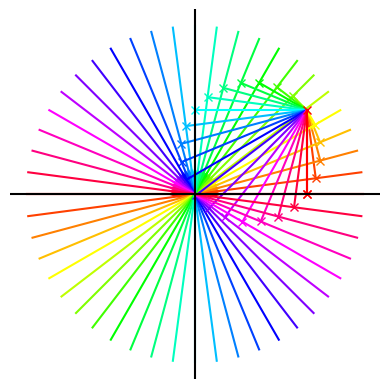

In [4]:
fig, ax = plt.subplots()  # 创建绘图子图

## 投影计算和绘图
for i, theta in enumerate(thetas):  # 遍历每个角度 theta
    v = np.array([np.cos(theta), np.sin(theta)])  # 计算单位向量 v
    
    proj = np.dot(v, x)  # 计算 x 在 v 上的投影长度

    # 根据角度映射颜色 (HSV 色谱)
    hue = theta / np.pi  # 将角度归一化到 [0, 1]
    color = hsv_to_rgb([hue, 1, 1])  # 转换为 RGB 颜色

    # 绘制投影方向上的直线
    ax.plot([-v[0]*6, v[0]*6], [-v[1]*6, v[1]*6], color=color)
    
    # 绘制 x 到投影点的线段
    proj_point = proj * v  # 投影点坐标
    ax.plot([x[0], proj_point[0]], [x[1], proj_point[1]], color=color, linestyle='-')
    
    # 绘制投影点
    ax.plot(proj_point[0], proj_point[1], color=color, marker='x')

    # 绘制单位向量 v
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color)

## 绘制向量 x 的位置
ax.plot(x[0], x[1], marker='x', color='r', label='Vector x')  # 绘制向量 x 的起点
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
## 设置坐标轴比例
ax.set_aspect('equal', 'box')
ax.axis(False)